# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica. Área de curvas.

### Ejercicio 28.- Recordad que si $\rho_1(\theta) \leq \rho_2(\theta)$ con $\theta \in [\theta_0,\theta_1]$, entonces el área delimitada por las curvas $\rho_1=\rho_1(\theta)$, $\rho_2=\rho_2(\theta)$ y el sector $\theta_0 \leq \theta \leq \theta_1$ viene dada por:
### $$
A=\dfrac{1}{2}\int_{\theta_0}^{\theta_1} (\rho_2(\theta)^2-\rho_1(\theta)^2) d\theta. $$
### Usar esta fórmula para calcular el área delimitada por la cardioide $\rho(\theta)=1-\cos(\theta)$ y la circunferencia $\rho=1$ utilizando el método de Simpson con $n=4$ parábolas.

SOLUCIÓN

Definimos la variable $\theta$ que representa a "angulo".

In [1]:
angulo=var('angulo')

Ahora dibujamos nuestra curva cardiode y la circunferencia. En el dibujo observamos que hay dos zonas que cumplen con las hipótesis del ejercicio. Son aquellas que tienen un color gris claro.

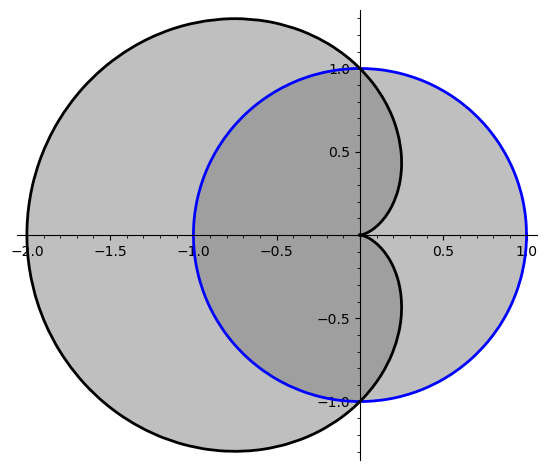

In [2]:
polar_plot(1, (angulo, 0, 2*pi), thickness=2,fill=True)+polar_plot(1-cos(angulo), (angulo,0,2*pi),color='black',thickness=2,fill=True)

Una de las áreas a calcular es la siguiente, vamos a llamarla área_beso, este área se corresponde con los ángulo comprendidos entre $-\pi/2$ y $\pi/2$. Es el área gris claro.

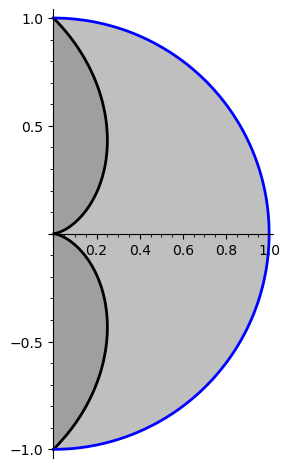

In [3]:
polar_plot(1-cos(angulo), (angulo, -pi/2, pi/2),color='black', thickness=2,fill=True)+polar_plot(1, (angulo, -pi/2, pi/2), thickness=2,fill=True)

La otra área es la siguiente, la vamos a llamar área_luna, este área se corresponde con los ángulo comprendidos entre $\pi/2$ y $3\pi/2$. Es el área gris claro.

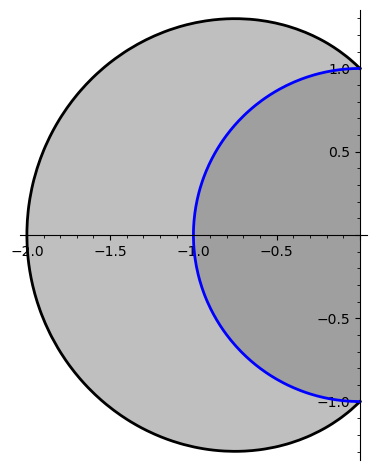

In [4]:
polar_plot(1-cos(angulo),(angulo, pi/2, 3*pi/2),color='black',thickness=2,fill=True)+polar_plot(1,(angulo, pi/2, 3*pi/2),thickness=2,fill=True)

Comezamos con el área_beso.

Tenemos que buscar la función que vamos a integrar y si observamos el enunciado del problema nos dice que hay que calcular
$$f(\theta)=\dfrac{\rho_2(\theta)^2-\rho_1(\theta)^2}{2}=\dfrac{1^2-(1-\cos(\theta))^2}{2}=
\dfrac{1-(1-2\cos(\theta)+\cos^2(\theta))}{2}=\dfrac{2\cos(\theta)-\cos^2(\theta)}{2}$$

Obsérvese que en el área_beso, la circunferencia está por encima de la cardioide, por esa razón $\rho_2(\theta)=1$ y $\rho_1(\theta)=1-\cos(\theta)$.

In [5]:
f(angulo)=(2*cos(angulo)-(cos(angulo)^2))/2
show(f)

angulo |--> -1/2*cos(angulo)^2 + cos(angulo)

In [6]:
int(angulo)=integral(f,angulo)
show(int)

angulo |--> -1/4*angulo - 1/8*sin(2*angulo) + sin(angulo)

In [7]:
int(pi/2)-int(-pi/2)

-1/4*pi + 2

In [8]:
numerical_integral(f,-pi/2,pi/2)[0] 

1.214601836602552

Tras los anteriores preliminares necesitamos calcular el área de la siguiente función usando el Método de Simpson para aproximar el área_beso:

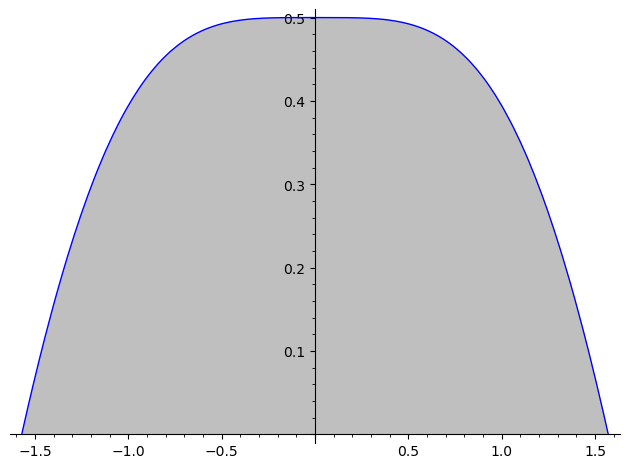

In [9]:
plot(f,-pi/2,pi/2,fill=True)

Dada la simetría que observamos vamos a integrar entre $0$ y $\pi/2$ y después multiplicaremos los resultados por $2$. 

In [10]:
a=0
b=pi/2
n=4

In [11]:
X=[a+k*(b-a)/(2*n) for k in [0..2*n]]; 
show(X)

[0, 1/16*pi, 1/8*pi, 3/16*pi, 1/4*pi, 5/16*pi, 3/8*pi, 7/16*pi, 1/2*pi]

Ahora aplicamos la fórmula del Método de Simpson: 
 $$  \int_{\theta_0}^{\theta_1} f(\theta) \, d\theta \ \approx \ {{\rm Simpson}_{ {{\bf n}}}(f)}=  \frac{\theta_1-\theta_0}{6n}\left(f(\theta_0)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(\theta_1)\right) $$

In [12]:
simpson=(b-a)/(6*n)*(f(X[0])+4*sum(f(X[2*k-1]) for k in [1..n])+2*sum(f(X[2*k]) for k in [1..n-1])+f(X[2*n]))
simpson.n()

0.607309213825244

Por supuesto, finalmente la integral pedida es el doble de este resultado.

In [13]:
2*simpson.n()

1.21461842765049

Seguimos con el área_luna.

Tenemos que buscar la función que vamos a integrar y si observamos el enunciado del problema nos dice que hay que calcular
$$g(\theta)=\dfrac{\rho_2(\theta)^2-\rho_1(\theta)^2}{2}=\dfrac{(1-\cos(\theta))^2-1^2}{2}=
\dfrac{1-2\cos(\theta)+\cos^2(\theta)-1}{2}=\dfrac{-2\cos(\theta)+\cos^2(\theta)}{2}$$

Obsérvese que en el área_luna, la circunferencia está por debajo de la cardioide, por esa razón $\rho_2(\theta)=1-\cos(\theta)$ y $\rho_1(\theta)=1$.

In [14]:
g(angulo)=(-2*cos(angulo)+(cos(angulo)^2))/2
show(g)

angulo |--> 1/2*cos(angulo)^2 - cos(angulo)

In [15]:
int(angulo)=integral(g,angulo)
show(int)

angulo |--> 1/4*angulo + 1/8*sin(2*angulo) - sin(angulo)

In [16]:
int(3*pi/2)-int(pi/2)

1/4*pi + 2

In [17]:
numerical_integral(g,pi/2,3*pi/2)[0] 

2.7853981633974483

Tras los anteriores preliminares necesitamos calcular el área de la la siguiente función usando el Método de Simpson para aproximar el área_luna:

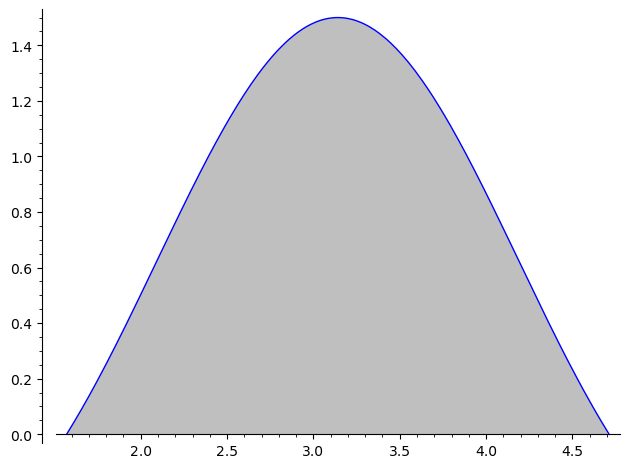

In [18]:
plot(g,pi/2,3*pi/2,fill=True)

Dada la simetría del área vamos a integrar entre $\pi/2$ y $\pi$ y después multiplicaremos el resultado por $2$. 

In [19]:
a=pi/2
b=pi
n=4

In [20]:
X=[a+k*(b-a)/(2*n) for k in [0..2*n]]; 
show(X)

[1/2*pi, 9/16*pi, 5/8*pi, 11/16*pi, 3/4*pi, 13/16*pi, 7/8*pi, 15/16*pi, pi]

Ahora aplicamos la fórmula del Método de Simpson: 
 $$  \int_{\theta_0}^{\theta_1} g(\theta) \, d\theta \ \approx \ {{\rm Simpson}_{ {{\bf n}}}(g)}=  \frac{\theta_1-\theta_0}{6n}\left(g(\theta_0)+4\sum_{k=1}^n g(x_{2k-1})+2\sum_{k=1}^{n-1}g(x_{2k})+g(\theta_1)\right) $$

In [21]:
simpson=(b-a)/(6*n)*(g(X[0])+4*sum(g(X[2*k-1]) for k in [1..n])+2*sum(g(X[2*k]) for k in [1..n-1])+g(X[2*n]))
simpson.n()

1.39270737722269

Por supuesto, finalmente la integral pedida es el doble de este resultado.

In [22]:
2*simpson.n()

2.78541475444538